<a href="https://colab.research.google.com/github/Ayush310803/ViT/blob/main/Pose_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics mediapipe opencv-python numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [3]:
import cv2
import torch
import numpy as np
from ultralytics import YOLO

model = YOLO("yolov8n-pose.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.52M/6.52M [00:00<00:00, 142MB/s]


In [4]:
import mediapipe as mp

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(static_image_mode=True, model_complexity=1, smooth_landmarks=True)

In [5]:
def process_image(image_path):
    image = cv2.imread(image_path)
    orig_h, orig_w, _ = image.shape
    results = model(image)

    for result in results:
        keypoints = result.keypoints.xy.cpu().numpy()
        mp_results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        for kp in keypoints:
            for x, y in kp:
                cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1)

        if mp_results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image,
                mp_results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=3, circle_radius=5),
                mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2)
            )

    return image


0: 640x640 1 person, 8.4ms
Speed: 15.0ms preprocess, 8.4ms inference, 334.4ms postprocess per image at shape (1, 3, 640, 640)


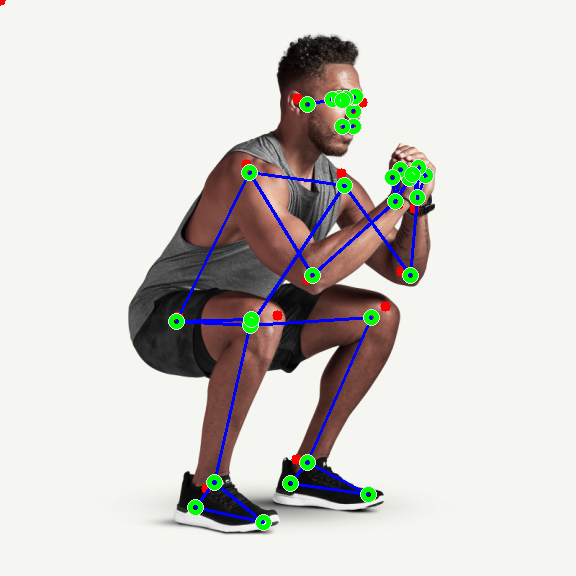

In [7]:
image_path = "/content/Bodyweight-Squat.jpg"
processed_image = process_image(image_path)

from google.colab.patches import cv2_imshow
cv2_imshow(processed_image)

In [8]:
!git clone https://github.com/CMU-Perceptual-Computing-Lab/openpose.git
!cd openpose


Cloning into 'openpose'...
remote: Enumerating objects: 16156, done.
remote: Total 16156 (delta 0), reused 0 (delta 0), pack-reused 16156 (from 1)
Receiving objects: 100% (16156/16156), 84.46 MiB | 34.24 MiB/s, done.
Resolving deltas: 100% (11324/11324), done.


In [9]:
!apt-get install -y --no-install-recommends \
    build-essential \
    libboost-all-dev \
    libhdf5-serial-dev \
    libgflags-dev \
    libgoogle-glog-dev \
    liblmdb-dev \
    libprotobuf-dev \
    libleveldb-dev \
    libsnappy-dev \
    protobuf-compiler


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libhdf5-dev' instead of 'libhdf5-serial-dev'
build-essential is already the newest version (12.9ubuntu3).
libboost-all-dev is already the newest version (1.74.0.3ubuntu7).
libhdf5-dev is already the newest version (1.10.7+repack-4ubuntu2).
protobuf-compiler is already the newest version (3.12.4-1ubuntu7.22.04.1).
The following additional packages will be installed:
  libgflags2.2 libgoogle-glog0v5 libleveldb1d liblmdb0 libprotobuf-lite23 libunwind-dev
Suggested packages:
  leveldb-doc
Recommended packages:
  lmdb-doc
The following NEW packages will be installed:
  libgflags-dev libgflags2.2 libgoogle-glog-dev libgoogle-glog0v5 libleveldb-dev libleveldb1d
  liblmdb-dev liblmdb0 libprotobuf-dev libprotobuf-lite23 libsnappy-dev libunwind-dev
0 upgraded, 12 newly installed, 0 to remove and 23 not upgraded.
Need to get 4,210 kB of archives.
After this operation, 21.5 MB of addit

In [10]:
!apt-get install -y --no-install-recommends \
    cuda-command-line-tools-11-0 \
    cuda-cublas-dev-11-0 \
    cuda-cudart-dev-11-0 \
    cuda-cupti-dev-11-0 \
    cuda-libraries-dev-11-0 \
    libcudnn8-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package cuda-cublas-dev-11-0


In [11]:
!cd openpose/build/python
!python setup.py install


/bin/bash: line 1: cd: openpose/build/python: No such file or directory
python3: can't open file '/content/setup.py': [Errno 2] No such file or directory


In [ ]:
!nvcc --version
!cat /usr/include/cudnn_version.h | grep CUDNN_MAJOR -A 2

In [12]:
!sudo apt-get purge nvidia-cuda-toolkit
!sudo apt-get install cuda-11-8

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package 'nvidia-cuda-toolkit' is not installed, so not removed
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Some packages could not be installed. This may mean that you have
requested an impossible situation or if you are using the unstable
distribution that some required packages have not yet been created
or been moved out of Incoming.
The following information may help to resolve the situation:

The following packages have unmet dependencies:
 cuda-drivers-570 : Depends: nvidia-driver-570 (>= 570.86.15) but it is not installable or
                             nvidia-driver-570-open (>= 570.86.15) but it is not installable or
                             nvidia-driver-570-server (>= 570.86.15) but it is not installable or
                             nvidia-driver-570-server

In [13]:
!sudo rm /var/lib/dpkg/lock-frontend
!sudo rm /var/lib/dpkg/lock
!sudo dpkg --configure -a
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-keyring_1.0-1_all.deb
!dpkg -i cuda-keyring_1.0-1_all.deb
!apt-get update
!apt-get install -y cuda-11-8 libcudnn8 libcudnn8-dev

--2025-02-18 13:02:54--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-keyring_1.0-1_all.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 23.59.88.195, 23.59.88.207
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|23.59.88.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4328 (4.2K) [application/x-deb]
Saving to: ‘cuda-keyring_1.0-1_all.deb.1’

cuda-keyring_1.0-1_ 100%[===================>]   4.23K  --.-KB/s    in 0s      

2025-02-18 13:02:54 (2.61 GB/s) - ‘cuda-keyring_1.0-1_all.deb.1’ saved [4328/4328]

(Reading database ... 125208 files and directories currently installed.)
Preparing to unpack cuda-keyring_1.0-1_all.deb ...
Unpacking cuda-keyring (1.0-1) over (1.0-1) ...
Setting up cuda-keyring (1.0-1) ...
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InR